In [345]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

# 参考文献

WEB(最終閲覧日 2019年2月4日)

 - [乃木坂46公式サイト](http://www.nogizaka46.com/member) http://www.nogizaka46.com/member/ （2019年2月4日）
 - [乃木坂46メンバー一覧 - エケペディア](https://48pedia.org/%E4%B9%83%E6%9C%A8%E5%9D%8246%E3%83%A1%E3%83%B3%E3%83%90%E3%83%BC%E4%B8%80%E8%A6%A7) https://48pedia.org/%E4%B9%83%E6%9C%A8%E5%9D%8246%E3%83%A1%E3%83%B3%E3%83%90%E3%83%BC%E4%B8%80%E8%A6%A7 (2019年2月4日)

# 乃木坂46メンバーの在籍期間データ

取得元サイト
https://48pedia.org/%E4%B9%83%E6%9C%A8%E5%9D%8246%E3%83%A1%E3%83%B3%E3%83%90%E3%83%BC%E4%B8%80%E8%A6%A7

In [316]:
DATASET_PATH = './dataset/{file_name}.csv'


# 在籍メンバーのデータを読み込む
active_member_df = pd.read_csv(
    DATASET_PATH.format(file_name='乃木坂46在籍メンバー'), 
    names=['名前', '生年月日', '出身地', '期', '備考']
)

# 卒業メンバーのデータを読み込む
graduated_member_df   = pd.read_csv(
    DATASET_PATH.format(file_name='乃木坂46卒業メンバー'), 
    names=['名前', '生年月日', '出身地', '期', '最終在籍日', '備考']
)

In [317]:
active_member_df.head()

,名前,生年月日,出身地,期,備考
0,秋元真夏（あきもと まなつ）,1993年8月20日 （25歳）,埼玉県,1期,NaN
1,生田絵梨花（いくた えりか）,1997年1月22日 （22歳）,東京都,1期,NaN
2,伊藤かりん（いとう かりん）,1993年5月26日 （25歳）,神奈川県,2期,NaN
3,伊藤純奈（いとう じゅんな）,1998年11月30日 （20歳）,神奈川県,2期,NaN
4,伊藤理々杏（いとう りりあ）,2002年10月8日 （16歳）,沖縄県,3期,NaN


In [318]:
graduated_member_df.head()

,名前,生年月日,出身地,期,最終在籍日,備考
0,山本穂乃香（やまもと ほのか）,1998年3月31日 （20歳）,愛知県,1期,2011年9月22日\n（活動辞退）,現芸名・本名：山本穂乃果\n元オフィスニグンニイバ所属\n元レプロアスター所属
1,吉本彩華（よしもと あやか）,1996年8月18日 （22歳）,熊本県,1期,2011年9月22日\n（活動辞退）,NaN
2,岩瀬佑美子（いわせ ゆみこ）,1990年6月12日 （28歳）,埼玉県,1期,2012年11月18日,NaN
3,安藤美雲（あんどう みくも）,1993年5月21日 （25歳）,神奈川県,1期,2013年6月16日,NaN
4,柏幸奈（かしわ ゆきな）,1994年8月12日 （24歳）,神奈川県,1期,2013年11月17日,元スターダストプロモーション所属\nイー・コンセプト所属


In [319]:
print('在籍メンバー数 = ', active_member_df.shape[0])
print('卒業メンバー数 = ', graduated_member_df.shape[0])

在籍メンバー数 =  47
卒業メンバー数 =  27


## データを統合する

In [320]:
active_member_df['卒業'] = False
graduated_member_df['卒業'] = True

In [321]:
columns = ['名前', '生年月日', '出身地', '期', '最終在籍日', '備考', '卒業']
# 在籍メンバーと卒業メンバーを統合.
nogizaka46_member_df = pd.concat([active_member_df, graduated_member_df], ignore_index=True)[columns]
nogizaka46_member_df.head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業
0,秋元真夏（あきもと まなつ）,1993年8月20日 （25歳）,埼玉県,1期,NaN,NaN,False
1,生田絵梨花（いくた えりか）,1997年1月22日 （22歳）,東京都,1期,NaN,NaN,False
2,伊藤かりん（いとう かりん）,1993年5月26日 （25歳）,神奈川県,2期,NaN,NaN,False
3,伊藤純奈（いとう じゅんな）,1998年11月30日 （20歳）,神奈川県,2期,NaN,NaN,False
4,伊藤理々杏（いとう りりあ）,2002年10月8日 （16歳）,沖縄県,3期,NaN,NaN,False


In [322]:
print('在籍メンバー数 + 卒業メンバー数 = ', nogizaka46_member_df.shape[0])
print('在籍メンバー数 = ', (nogizaka46_member_df['卒業'] == False).sum())
print('卒業メンバー数 = ', (nogizaka46_member_df['卒業'] == True).sum())

在籍メンバー数 + 卒業メンバー数 =  74
在籍メンバー数 =  47
卒業メンバー数 =  27


## 在籍期間を追加
参考サイト
https://ja.wikipedia.org/wiki/%E4%B9%83%E6%9C%A8%E5%9D%8246#%E3%82%AA%E3%83%BC%E3%83%87%E3%82%A3%E3%82%B7%E3%83%A7%E3%83%B3

In [323]:
from datetime import date 


class_date_df = pd.DataFrame({
    '期' : ['1期', '2期', '3期', '4期'],
    '加入日': ['2011-08-21', '2013-05-12', '2016-09-04', '2018-11-29'] 
})
class_date_df.head()

,加入日,期
0,2011-08-21,1期
1,2013-05-12,2期
2,2016-09-04,3期
3,2018-11-29,4期


In [324]:
nogizaka46_member_df = nogizaka46_member_df.merge(class_date_df)
nogizaka46_member_df.head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日
0,秋元真夏（あきもと まなつ）,1993年8月20日 （25歳）,埼玉県,1期,NaN,NaN,False,2011-08-21
1,生田絵梨花（いくた えりか）,1997年1月22日 （22歳）,東京都,1期,NaN,NaN,False,2011-08-21
2,井上小百合（いのうえ さゆり）,1994年12月14日 （24歳）,埼玉県,1期,NaN,NaN,False,2011-08-21
3,衛藤美彩（えとう みさ）,1993年1月4日 （26歳）,大分県,1期,NaN,NaN,False,2011-08-21
4,齋藤飛鳥（さいとう あすか）,1998年8月10日 （20歳）,東京都,1期,NaN,NaN,False,2011-08-21


In [326]:
nogizaka46_member_df['加入日'] = pd.to_datetime(nogizaka46_member_df['加入日'])

is_active = (nogizaka46_member_df['卒業'] == False)
is_graduate = (nogizaka46_member_df['卒業'] == True)

### 卒業生の在籍期間を計算

In [331]:
nogizaka46_member_df[is_graduate].head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日
14,山本穂乃香（やまもと ほのか）,1998年3月31日 （20歳）,愛知県,1期,2011年9月22日\n（活動辞退）,現芸名・本名：山本穂乃果\n元オフィスニグンニイバ所属\n元レプロアスター所属,True,2011-08-21
15,吉本彩華（よしもと あやか）,1996年8月18日 （22歳）,熊本県,1期,2011年9月22日\n（活動辞退）,NaN,True,2011-08-21
16,岩瀬佑美子（いわせ ゆみこ）,1990年6月12日 （28歳）,埼玉県,1期,2012年11月18日,NaN,True,2011-08-21
17,安藤美雲（あんどう みくも）,1993年5月21日 （25歳）,神奈川県,1期,2013年6月16日,NaN,True,2011-08-21
18,柏幸奈（かしわ ゆきな）,1994年8月12日 （24歳）,神奈川県,1期,2013年11月17日,元スターダストプロモーション所属\nイー・コンセプト所属,True,2011-08-21


In [332]:
nogizaka46_member_df.loc[is_graduate, '最終在籍日'] = nogizaka46_member_df[is_graduate]['最終在籍日'].str.extract(r'^([0-9]+年[0-9]+月[0-9]+日).*')

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [333]:
nogizaka46_member_df[is_graduate].head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日
14,山本穂乃香（やまもと ほのか）,1998年3月31日 （20歳）,愛知県,1期,2011年9月22日,現芸名・本名：山本穂乃果\n元オフィスニグンニイバ所属\n元レプロアスター所属,True,2011-08-21
15,吉本彩華（よしもと あやか）,1996年8月18日 （22歳）,熊本県,1期,2011年9月22日,NaN,True,2011-08-21
16,岩瀬佑美子（いわせ ゆみこ）,1990年6月12日 （28歳）,埼玉県,1期,2012年11月18日,NaN,True,2011-08-21
17,安藤美雲（あんどう みくも）,1993年5月21日 （25歳）,神奈川県,1期,2013年6月16日,NaN,True,2011-08-21
18,柏幸奈（かしわ ゆきな）,1994年8月12日 （24歳）,神奈川県,1期,2013年11月17日,元スターダストプロモーション所属\nイー・コンセプト所属,True,2011-08-21


In [334]:
graduate_day = pd.to_datetime(nogizaka46_member_df[is_graduate]['最終在籍日'], format='%Y年%m月%d日')
survival_days = graduate_day.subtract(nogizaka46_member_df[is_graduate]['加入日']).dt.days

In [335]:
# 卒業生の在籍期間
survival_days.head()

14     32
15     32
16    455
17    665
18    819
dtype: int64

In [336]:
nogizaka46_member_df.loc[is_graduate, '在籍時間'] = survival_days
nogizaka46_member_df[is_graduate].head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日,在籍時間
14,山本穂乃香（やまもと ほのか）,1998年3月31日 （20歳）,愛知県,1期,2011年9月22日,現芸名・本名：山本穂乃果\n元オフィスニグンニイバ所属\n元レプロアスター所属,True,2011-08-21,32.0
15,吉本彩華（よしもと あやか）,1996年8月18日 （22歳）,熊本県,1期,2011年9月22日,NaN,True,2011-08-21,32.0
16,岩瀬佑美子（いわせ ゆみこ）,1990年6月12日 （28歳）,埼玉県,1期,2012年11月18日,NaN,True,2011-08-21,455.0
17,安藤美雲（あんどう みくも）,1993年5月21日 （25歳）,神奈川県,1期,2013年6月16日,NaN,True,2011-08-21,665.0
18,柏幸奈（かしわ ゆきな）,1994年8月12日 （24歳）,神奈川県,1期,2013年11月17日,元スターダストプロモーション所属\nイー・コンセプト所属,True,2011-08-21,819.0


### 在籍生の在籍期間を計算

In [337]:
nogizaka46_member_df[is_active].head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日,在籍時間
0,秋元真夏（あきもと まなつ）,1993年8月20日 （25歳）,埼玉県,1期,NaN,NaN,False,2011-08-21,NaN
1,生田絵梨花（いくた えりか）,1997年1月22日 （22歳）,東京都,1期,NaN,NaN,False,2011-08-21,NaN
2,井上小百合（いのうえ さゆり）,1994年12月14日 （24歳）,埼玉県,1期,NaN,NaN,False,2011-08-21,NaN
3,衛藤美彩（えとう みさ）,1993年1月4日 （26歳）,大分県,1期,NaN,NaN,False,2011-08-21,NaN
4,齋藤飛鳥（さいとう あすか）,1998年8月10日 （20歳）,東京都,1期,NaN,NaN,False,2011-08-21,NaN


In [338]:
from datetime import date


nogizaka46_member_df.loc[is_active, '最終在籍日'] = date(2019, 2, 5)

In [339]:
timedelta = pd.to_datetime(nogizaka46_member_df.loc[is_active, '最終在籍日']).subtract(nogizaka46_member_df[is_active]['加入日'])
survival_days = timedelta.dt.days

In [340]:
# 在籍生の（今日までの）在籍期間
survival_days.head()

0    2725
1    2725
2    2725
3    2725
4    2725
dtype: int64

In [341]:
nogizaka46_member_df.loc[is_active, '在籍時間'] = survival_days
nogizaka46_member_df[is_active].head()

,名前,生年月日,出身地,期,最終在籍日,備考,卒業,加入日,在籍時間
0,秋元真夏（あきもと まなつ）,1993年8月20日 （25歳）,埼玉県,1期,2019-02-05,NaN,False,2011-08-21,2725.0
1,生田絵梨花（いくた えりか）,1997年1月22日 （22歳）,東京都,1期,2019-02-05,NaN,False,2011-08-21,2725.0
2,井上小百合（いのうえ さゆり）,1994年12月14日 （24歳）,埼玉県,1期,2019-02-05,NaN,False,2011-08-21,2725.0
3,衛藤美彩（えとう みさ）,1993年1月4日 （26歳）,大分県,1期,2019-02-05,NaN,False,2011-08-21,2725.0
4,齋藤飛鳥（さいとう あすか）,1998年8月10日 （20歳）,東京都,1期,2019-02-05,NaN,False,2011-08-21,2725.0


# ノンパラメトリック分析

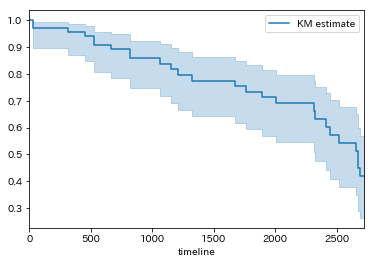

In [346]:
from lifelines import KaplanMeierFitter


survival_time_col = '在籍時間'
event_col              = '卒業'
survival_times      = nogizaka46_member_df[survival_time_col]
events                    = nogizaka46_member_df[event_col]

# fitting
kmf = KaplanMeierFitter()
kmf.fit(survival_times, event_observed=events, label='KM estimate')

# plot
plt.figure(figsize=(15, 8))
kmf.plot(ci_show=True)
plt.show()

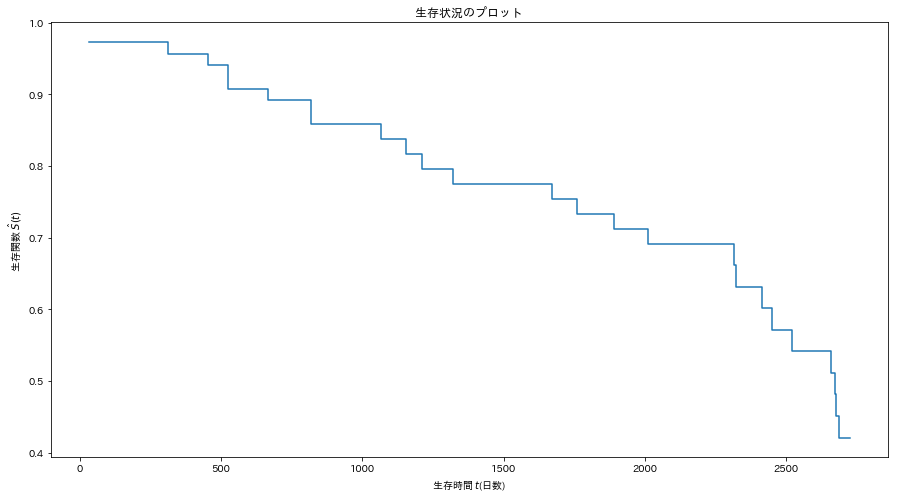

In [351]:
from sksurv.nonparametric import kaplan_meier_estimator


survival_bools = nogizaka46_member_df['卒業'].values
survival_times = nogizaka46_member_df['在籍時間'].values

time, survival_prob = kaplan_meier_estimator(survival_bools, survival_times)

plt.figure(figsize=(15, 8))
plt.title('生存状況のプロット')
plt.step(time, survival_prob, where="post")
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$(日数)")
plt.show()